# Exercice : générer un échantillon de copule gaussienne et de marginale exponentielle

## Introduction

Les copules sont utiles pour générer des variables aléatoires multivariées dépendantes au delà des cas particuliers tels que la loi gaussienne. L'objectif de cet exercice est, justement, d'illuster pourquoi et comment il est facile de générer un vecteur aléatoire de copule gaussienne. 

Supposons que l'on souhaite générer le vecteur aléatoire $(X_1, ..., X_p)^T$ de marginales exponentielles standard (i.e. de moyenne $\lambda=1$) et de copule gaussienne. Pour cela, on considère le vecteur aléatoire $Y = (Y_1, ..., Y_p)^T$ de loi gaussienne $\mathcal{N}(0,\Sigma)$. Puis on évalue le vecteur $(U_1, ..., U_p)^T$ par les équations :
$$
U_i  = \Phi\left(\frac{Y_i}{Var(Y_i)^{1/2}}\right), \qquad \textrm{(1)}
$$
pour $i=1,...,p$, où $\Phi$ est la fonction de répartition de la loi gaussienne centrée-réduite (i.e. de moyenne nulle et d'écart-type unité). 
Alors les marginales du vecteur $(U_1, ..., U_p)^T$ sont de loi uniforme $\mathcal{U}(0, 1)$. 
Enfin, nous considérons la variable :
$$
X_i = -\log(1 - U_i), \qquad \textrm{(2)}
$$
pour $i=1,...,p$. 

L'objectif de cet exercice est de comparer l'approche proposée dans le texte précédent, de valider qu'elle possède les propriétés requises et de comparer avec une approche fondée directement sur la copule gaussienne.

**Questions**

**Partie 1 : avec un algorithme**
- Créer la liste `mu` contenant 2 zéros.
- Créer la matrice de covariance `Sigma` contenant les valeurs `[2.,1.,1.,4.]`.
- Utiliser la classe `Normal` pour créer la variable `n` contenant une variable gaussienne bi-dimensionnelle associée à la moyenne `mu` et la matrice de covariance `Sigma`.
- Créer la variable `y` contenant un échantillon de taille 500 de la variable `n`.
- Utiliser la classe `Pairs` pour tracer la projection du nuage de points.
- Utiliser l'équation (1) pour créer la variable `u` à partir de la variable `y`. Dessiner le nuage de points contenu dans la variable `u`.
- Utiliser l'équation (2) pour créer la variable `x` à partir de la variable `u`. Dessiner le nuage de points contenu dans la variable `x`.
- Utiliser la classe `VisualTest_DrawHistogram` pour vérifier que les marginales de `x` sont de loi exponentielle. Pour cela, utiliser la méthode `Exponential().drawPDF()`.
- Utiliser la méthode `x.rank()` pour dessiner le nuage de points dans l'espace des rangs. Dans la suite de cet exercice, nous allons comparer ce nuage de points avec les iso-valeurs de la copule gaussienne.

**Partie 2 : avec NormalCopula**
- Utiliser la méthode `n.getCorrelation()` pour récupérer la matrice de corrélation de `n` et créer la variable `c` contenant la copule gaussienne avec la classe `NormalCopula`.
- Utiliser la méthode `drawPDF` pour dessiner les iso-valeurs de la copule gaussienne : comment cela se compare-t-il avec le nuage de points précédent ?
- Utiliser la classe `ComposedDistribution` pour créer la loi bidimensionnelle `cod` de marginales exponentielles et de copule `c`.
- Créer la variable `samplex` contenant un échantillon de la variable `cod` de taille 500. Dessiner le nuage de points et comparer avec le nuage précédent : qu'observez-vous ?
- Utiliser la classe `VisualTest_DrawKendallPlot` pour vérifier l'adéquation de la loi de l'échantillon `x` et de la copule `c` : la dépendance est-elle celle à laquelle on s'attend ?

## Référence

Søren Asmussen, Peter W. Glynn

Stochastic Simulation: Algorithms and Analysis

2007 Springer

Section 3c Copulas, page 38

In [1]:
%matplotlib inline
import openturns as ot
import numpy as np

## Partie 1 : avec un algorithme

On commence par créer la moyenne, la matrice de covariance et la variable gaussienne.

In [2]:
dim = 2
mu = [0.]*dim

In [3]:
Sigma = ot.CovarianceMatrix(dim, [2.,1.,1.,4.])
Sigma

class=CovarianceMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[2,1,1,4]

In [4]:
n = ot.Normal(mu, Sigma)

Puis on génère un échantillon de taille 500, que l'on visualise.

In [5]:
sampleSize = 500
y = n.getSample(sampleSize)
y.setDescription(["Y0","Y1"])

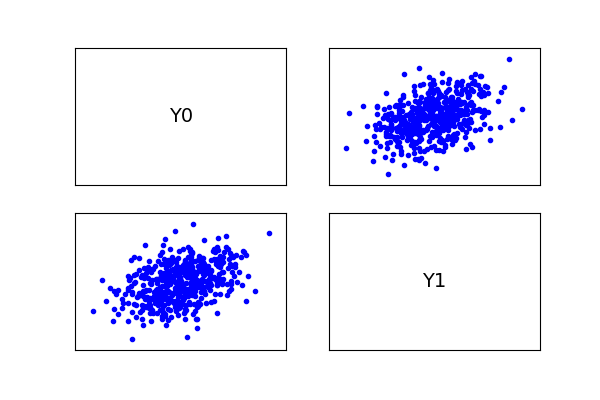

In [6]:
def plotPairs(sample):
    graph = ot.Graph("", "", "", True, "")
    labels = sample.getDescription()
    pairs = ot.Pairs(sample, "", labels, "blue", "bullet")
    graph.add(pairs)
    return graph
plotPairs(y)

On utilise l'équation (1) pour générer l'échantillon `u` de lois marginales uniformes. La fonction `pNormal` évalue la fonction de répartition de la loi gaussienne standard $\Phi$.

In [7]:
u = ot.Sample(sampleSize,dim)
u.setDescription(["U0","U1"])
for i in range(sampleSize):
    for j in range(dim):
        u[i,j] = ot.DistFunc.pNormal(y[i,j]/np.sqrt(Sigma[j,j]))

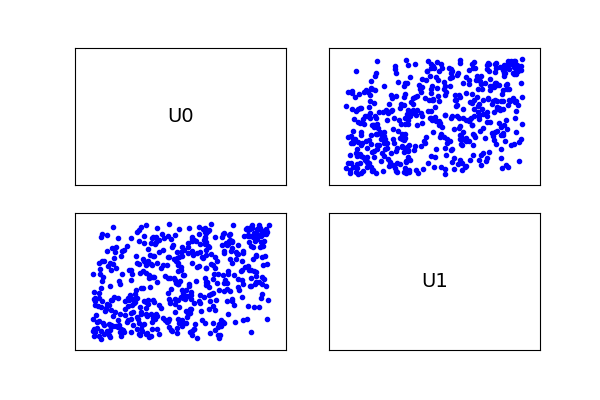

In [8]:
plotPairs(u)

On utilise l'équation (2) pour générer l'échantillon `x` de lois marginales exponentielles. On utilise la fonction `log1p` qui est plus précise lorsque l'argument d'entrée est proche de zéro. 

In [9]:
x = ot.Sample(sampleSize,dim)
x.setDescription(["X0","X1"])
x.setName("Generated")
for i in range(sampleSize):
    for j in range(dim):
        x[i,j] = -np.log1p(-u[i,j])

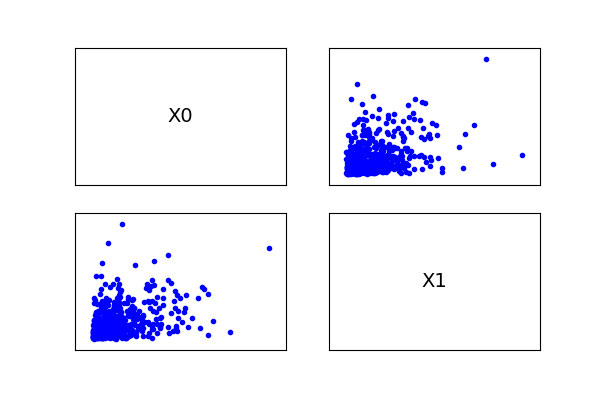

In [10]:
plotPairs(x)

On observe une plus grande densité de points en bas à gauche. 

On vérifie la loi marginale de l'échantillon en comparant son histogramme empirique et la PDF de la loi exponentielle.

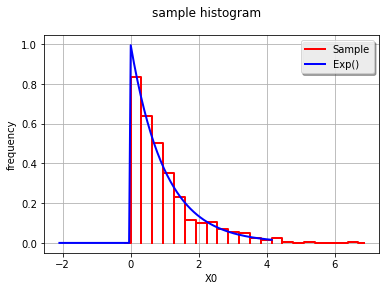

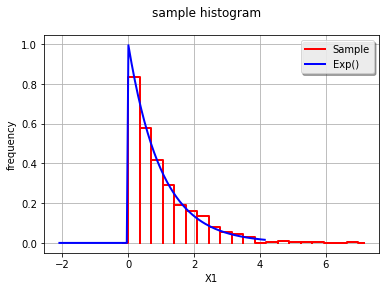

In [11]:
for i in range(dim):
    graph = ot.VisualTest_DrawHistogram(x[:,i])
    graph.setLegends(["Sample"])
    graph.setXTitle("X%d" % (i))
    gE = ot.Exponential().drawPDF()
    gE.setColors(["blue"])
    gE.setLegends(["Exp()"])
    graph.add(gE)
    ot.viewer.View(graph)

On observe que l'histogramme empirique est très proche de la densité de probabilité de la loi exponentielle. 

On vérifie la dépendance en dessinant la copule empirique.

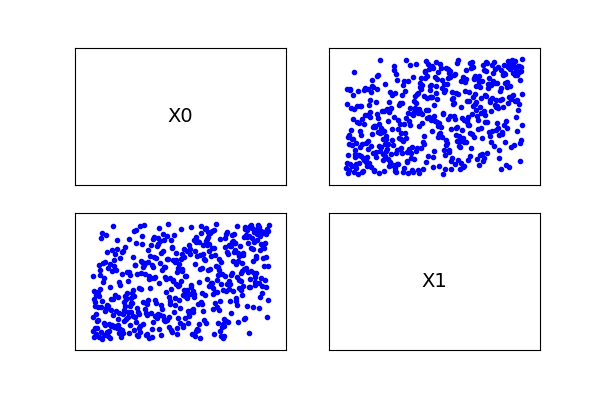

In [12]:
plotPairs(x.rank())

On observe qu'il y a plus de points en bas à gauche et en haut à droite et moins en haut à gauche et en bas à droite. Cela implique que le nuage de points est associé à une structure de dépendance (i.e. les marginales ne sont pas indépendantes). 

## Partie 2 : avec NormalCopula

In [13]:
R = n.getCorrelation()
R

class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.353553,0.353553,1]

In [14]:
c = ot.NormalCopula(R)

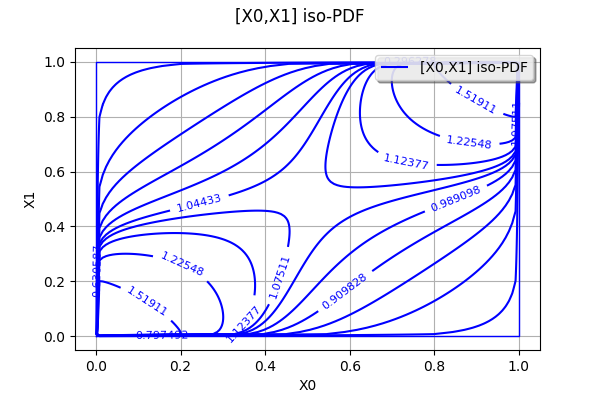

In [15]:
c.drawPDF()

On observe que la densité de copule correspond exactement au nuage de points dans l'espace des rangs que nous avons observé dans une cellule précédente. Cela confirme que la copule gaussienne a été correctement prise en compte dans notre algorithme de génération de l'échantillon. 

In [16]:
e = [ot.Exponential()]*dim
e

[class=Exponential name=Exponential dimension=1 lambda=1 gamma=0,
 class=Exponential name=Exponential dimension=1 lambda=1 gamma=0]

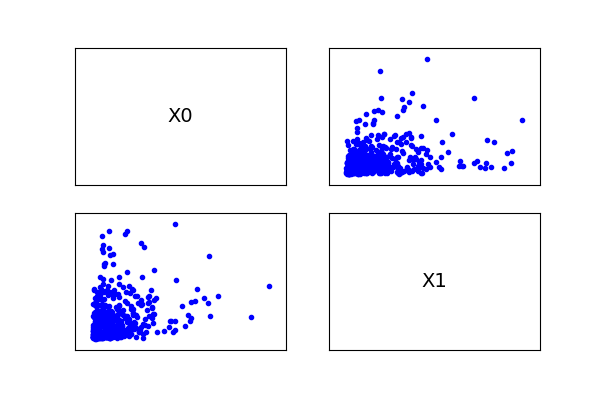

In [17]:
cod = ot.ComposedDistribution(e,c)
samplex = cod.getSample(sampleSize)
plotPairs(samplex)

On observe une plus grande densité de points en bas à gauche, comme nous l'avions déjà observé dans une cellule précédente. 

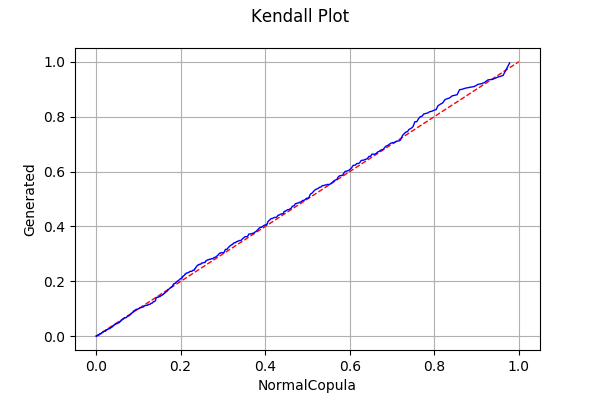

In [18]:
ot.VisualTest_DrawKendallPlot(x,c)

On observe que les points sont situés sur la première bissectrice, ce qui implique que les valeurs de la fonction de répartition de l'échantillon correspondent aux valeurs de la copule gaussienne. Cela confirme que la dépendance de l'échantillon est effectivement associé à une copule gaussienne.